In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import data_visualization as dv
wheel = dv.ColorWheel()
plt.style.use('cashaback_dark')
'''
v2 works nicely with indecision and incorrect costs. Everything checks out 

Now I want to implement a free parameter that manipulatues how much people weigh sensory evidence

They likely view their expected reward to be higher than it is OVER TIME for reacting
- Maybe their reward gain function doesn't decay as fast?
'''
np.set_printoptions(suppress=True)

In [27]:
SAVE_PATH = 'C:\\Users\\Seth Sullivan\\OneDrive - University of Delaware - o365\\Desktop\\MatchPennies-Agent-Expirement\\Modeling Figures\\Optimal Stopping Expected Reward Figures Group\\'

### Best Gain Function Equations

- Decision time and target reach time....
- Using B to determine the tendency of reacting or gambling 
    - This mainly sets the probability that someone will make an indecision if the agent hasn't gone after some time 
    - B = 0 means they have a tendency to gamble, B = 1 means they have a tendency to react
    - This only affects the indecision probability right now, but maybe I can tack it onto the probability of gamble reward and react reward? (probabaly not, these shouldn't depend on tendencies, they are just the gain function.... people's tendencies determine when they select a decision time)

Decision Time

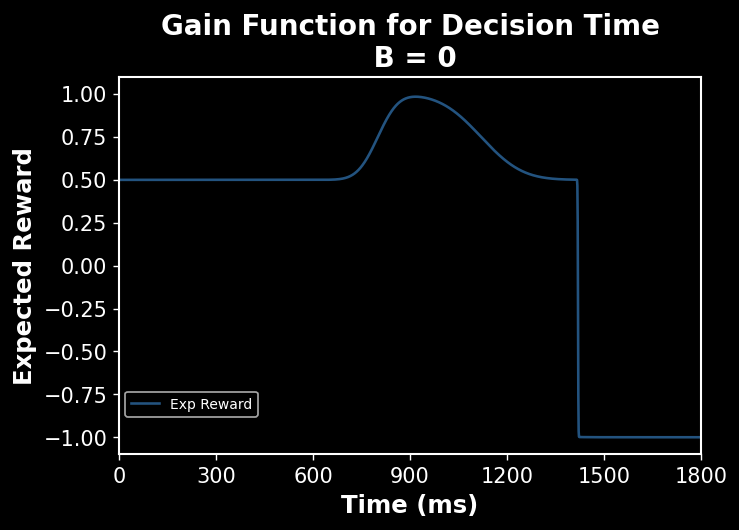

Optimal Decision Time: 917
Gamble Target Reach Time: 997
Reaction Target Reach Time: 1297


In [28]:
# Don't quite have the B working yet, but it's nice to have on the indecision probability
B_list = [0] #[0,0.5,1] # B is the likelihood that someone will gamble or react. B = 1 means they are very likely to react, B = 0 means they are very likely to gamble
for B in B_list:
    agent_mean,agent_std = 800,50
    timesteps = np.arange(0,2000,1)
    prob_agent_go = np.zeros(len(timesteps))
    prob_agent_no_go = np.zeros(len(timesteps))
    prob_making_react = np.zeros(len(timesteps))
    prob_making_gamble = np.zeros(len(timesteps))

    prob_of_reacting = np.zeros(len(timesteps))
    prob_of_gambling = np.zeros(len(timesteps))

    expected_reward = np.zeros(len(timesteps))
    expected_reward_gamble = np.zeros(len(timesteps))
    expected_reward_react = np.zeros(len(timesteps))
    prob_reward_gamble = np.zeros(len(timesteps))
    prob_reward_react = np.zeros(len(timesteps))
    prob_reward = np.zeros(len(timesteps))
    reaction_time = 300
    movement_time = 80
    reaction_movement_time = reaction_time + movement_time
    reaction_movement_uncertainty = 100 # We have some uncertainty about making it 
    movement_uncertainty = 1

    prob_success_gamble = 0.5 # IT'S NOT ABOUT THE PROBABILITY THAT I WILL SUCCEED WITH EACH ACTION... IT'S ABOUT THE PROBABILITY THAT I WILL BE ABLE TO SELECT THE OPTIMAL ACTION
    prob_success_react = 1.0
    win_reward = 1.0
    loss_cost = 0
    indecision_cost = -1.0
    i=-1
    for t in timesteps:
        i+=1
        prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
        prob_agent_no_go[i] = 1 - prob_agent_go[i]
        prob_making_react[i] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
        prob_making_gamble[i] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
        
    prob_reward_gamble = (prob_success_gamble)*prob_making_gamble
    prob_cost_gamble = (1-prob_success_gamble)*prob_making_gamble # Probability of receiving the Cost for being incorrect
    
    prob_reward_react = (prob_success_react*prob_agent_go)*prob_making_react 
    prob_cost_react = ((1-prob_success_react)*prob_agent_go)*prob_making_react # Probability of receiving the Cost for being incorrect
    
    prob_indecision_gamble = (1 - prob_making_gamble)
    prob_indecision_react = (1 - prob_making_react)    
    
    
    prob_reward = prob_reward_gamble + prob_reward_react - (prob_reward_gamble*prob_reward_react) # NEED TO SUBTRACT THE AND PROBABILITY?... this makes sense... If I go at that time, I at least have 0.5 PLUS the probability that the agent has gone will boost it up
    prob_cost = prob_cost_gamble + prob_cost_react  - (prob_cost_react*prob_cost_gamble)
    prob_indecision = prob_indecision_gamble + prob_indecision_react - (prob_indecision_gamble*prob_indecision_react) # Probability of indecision depends on if someone gambles
    
    #prob_indecision = prob_indecision_gamble*(1-B) + prob_indecision_react*B - prob_indecision_gamble*(1-B)*B*prob_indecision_react # Probability of indecision depends on if someone gambles 
    
    exp_reward_gamble = prob_reward_gamble*win_reward + prob_cost_gamble*loss_cost + prob_indecision_gamble*indecision_cost
    exp_reward_react = prob_reward_react*win_reward + prob_cost_react*loss_cost + prob_indecision_gamble*indecision_cost
    exp_reward = prob_reward*win_reward + prob_cost*loss_cost + (prob_indecision_gamble)*indecision_cost
            
    fig,ax = plt.subplots(dpi = 125)
    # ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
    # ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
    # ax.plot(timesteps, prob_making_react, label = 'Prob React Make')
    # ax.plot(timesteps, prob_making_gamble, label =  'Prob Gamble Make')
    # ax.plot(timesteps,prob_reward_gamble, label = 'Prob Reward Gamble')
    # ax.plot(timesteps,prob_reward_react, label = 'Prob Reward React')
    #ax.plot(timesteps,prob_reward, label = 'Probability of Reward')
    # ax.plot(timesteps, exp_reward_gamble, label = 'ER Gamble')
    # ax.plot(timesteps, exp_reward_react, label = 'ER React')
    # ax.plot(timesteps,exp_reward, label = 'Expected Reward', c= wheel.red)
    # ax.plot(timesteps, prob_indecision_gamble, label = 'Prob Indecision Gamble')
    # ax.plot(timesteps, prob_indecision_react, label = 'Prob Indecision React')
    # ax.plot(timesteps, prob_indecision, label = 'Prob Indecision', c = wheel.purple, ls = '--')
    # ax.plot(timesteps, prob_cost, label = 'Prob Cost')
    # ax.plot(timesteps, prob_indecision, label = 'Prob Indecision')
    ax.plot(timesteps, exp_reward, label = 'Exp Reward')
    # ax.plot(timesteps, prob_reward, label = 'Prob Reward', c = wheel.green, ls = '--')
    # ax.plot(timesteps, prob_indecision_gamble )


    ax.set_ylim(-1.1,1.1)
    ax.set_xlim(0,1500)
    ax.set_xticks(np.arange(0,2000,300))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Expected Reward')
    ax.legend(fontsize = 8,loc = (0.01,0.1))
    ax.set_title(f'Gain Function for Decision Time\n B = {B}')
    plt.show()
    optimal_decision_time  = np.argmax(prob_reward) 
    target_reach_time_on_gambles = optimal_decision_time + movement_time 
    target_reach_time_on_reactions = optimal_decision_time + reaction_movement_time
    print(f'Optimal Decision Time: {optimal_decision_time}') # Remember the task decision time is this 
    print(f'Gamble Target Reach Time: {target_reach_time_on_gambles}')
    print(f'Reaction Target Reach Time: {target_reach_time_on_reactions}')

In [29]:
percent_indecisions = 1 - stats.norm.cdf(1500,target_reach_time_on_reactions,70)
percent_indecisions

0.001865813300384045

Expected Reward for reach time
- Needed to adjust the timesteps when indexing
- Note the if statements have changed from probabiilty of making it for a certain decision time (from last cell) to the probability that I reach the target when reacting
- Also had to subtract movement time and reaction time from the prob_agent_go, because you only get to use the agent if the agent went before you moved 

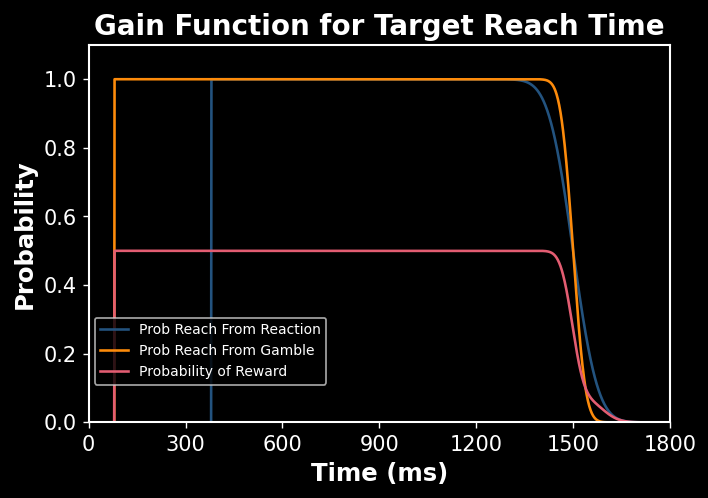

1371


In [30]:
agent_mean,agent_std = 1200,50
timesteps = np.arange(0,2000,1)

prob_agent_go = np.zeros(len(timesteps))
prob_agent_no_go = np.zeros(len(timesteps))
prob_making_react = np.zeros(len(timesteps))
prob_making_gamble = np.zeros(len(timesteps))
prob_reached_from_reaction = np.zeros(len(timesteps))
prob_reached_from_gamble = np.zeros(len(timesteps))

expected_reward = np.zeros(len(timesteps))
expected_reward_gamble = np.zeros(len(timesteps))
expected_reward_react = np.zeros(len(timesteps))

prob_reward_gamble = np.zeros(len(timesteps))
prob_reward_react = np.zeros(len(timesteps))
prob_reward = np.zeros(len(timesteps))

reaction_time = 300
movement_time = 80
reaction_movement_time = reaction_time + movement_time
reaction_movement_uncertainty = 60 # We have some uncertainty about making it 
movement_uncertainty = 30

prob_success_gamble = 0.5 # IT'S NOT ABOUT THE PROBABILITY THAT I WILL SUCCEED WITH EACH ACTION... IT'S ABOUT THE PROBABILITY THAT I WILL BE ABLE TO SELECT THE OPTIMAL ACTION
prob_success_react = 1.0
win_reward = 2.0
loss_cost = 0.0
indecision_cost = 0
B = 1
i=-1
for t in timesteps:
    i+=1
    prob_agent_go[i] = stats.norm.cdf(t,agent_mean,agent_std)
    prob_agent_no_go[i] = 1 - prob_agent_go[i]
    
    if t <= np.max(timesteps) - (reaction_time + movement_time):
        prob_reached_from_reaction[i+reaction_time+movement_time] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
    if t <= np.max(timesteps) - movement_time:
        prob_reached_from_gamble[i+movement_time] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
    
    # prob_making_react[i] = stats.norm.cdf(1500-t,reaction_movement_time,reaction_movement_uncertainty)
    # prob_making_gamble[i] = stats.norm.cdf(1500-t,movement_time,movement_uncertainty)
    
    prob_reward_gamble[i] = (prob_success_gamble)*prob_reached_from_gamble[i] 
    prob_reward_react[i] = (prob_success_react*prob_agent_go[i-reaction_time-movement_time])*prob_reached_from_reaction[i] 
    prob_reward[i] = prob_reward_gamble[i] + prob_reward_react[i] - (prob_reward_gamble[i]*prob_reward_react[i]) # NEED TO SUBTRACT THE AND PROBABILITY?
    
        
fig,ax = plt.subplots(dpi = 125)
# ax.plot(timesteps, prob_agent_go, label = 'Agent Go')
# ax.plot(timesteps, prob_agent_no_go, label =  'Agent No Go')
# ax.plot(timesteps, prob_making_react, label = 'Prob React Make')
# ax.plot(timesteps, prob_making_gamble, label =  'Prob Gamble Make')
ax.plot(timesteps,prob_reached_from_reaction, label = 'Prob Reach From Reaction')
ax.plot(timesteps,prob_reached_from_gamble, label = 'Prob Reach From Gamble')
ax.plot(timesteps,prob_reward, label = 'Probability of Reward')

ax.set_ylim(0,1.1)
ax.set_xlim(0,1500)
ax.set_xticks(np.arange(0,2000,300))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Probability')
ax.legend(fontsize = 8,loc = (0.01,0.1))
ax.set_title('Gain Function for Target Reach Time')
plt.show()

optimal_target_reach_time = np.argmax(prob_reward)
print(optimal_target_reach_time)

Get actual target reach time distribution based on timing uncertainty and calculate indecisions

In [31]:
percent_indecisions = 1- stats.norm.cdf(1500,optimal_target_reach_time,100)
percent_indecisions

0.09852532904974787

### Calculate Percent Wins, Percent Indecisions for each agent mean and std

Find optimal decision time function

In [32]:
def find_optimal_decision_time(agent_mean, agent_std, reaction_time,movement_time, reaction_uncertainty, movement_uncertainty,timing_uncertainty,
                               plot=False,save=False):
    B_list = [0,0.25,0.5,0.75,1]
    B_list = [1.0]
    for B in B_list:
        timesteps = np.arange(0,2000,1)
        prob_agent_go = np.zeros(len(timesteps))
        prob_agent_no_go = np.zeros(len(timesteps))
        prob_making_react = np.zeros(len(timesteps))
        prob_making_gamble = np.zeros(len(timesteps))
        prob_agent_making = np.zeros(len(timesteps))

        expected_reward = np.zeros(len(timesteps))
        expected_reward_gamble = np.zeros(len(timesteps))
        expected_reward_react = np.zeros(len(timesteps))
        prob_reward_gamble = np.zeros(len(timesteps))
        prob_reward_react = np.zeros(len(timesteps))
        prob_reward = np.zeros(len(timesteps))
        reaction_movement_time = reaction_time + movement_time

        

        prob_success_gamble = 0.5 # IT'S NOT ABOUT THE PROBABILITY THAT I WILL SUCCEED WITH EACH ACTION... IT'S ABOUT THE PROBABILITY THAT I WILL BE ABLE TO SELECT THE OPTIMAL ACTION
        prob_success_react = 1.0
        win_reward = 1.0
        loss_cost = 0.0
        indecision_cost = 0.0
        
        prob_agent_go = stats.norm.cdf(timesteps,agent_mean,agent_std)
        prob_agent_no_go = 1 - prob_agent_go
        prob_agent_making = stats.norm.cdf(1500-timesteps,agent_mean,agent_std)
        
        # Calculate reaction movement uncertainty basedon prob_agent_go
        reaction_movement_uncertainty = np.sqrt((movement_uncertainty)**2 + prob_agent_go*(reaction_uncertainty)**2) # We have some uncertainty about making it  
        total_uncertainty_reaction = np.sqrt(reaction_movement_uncertainty**2 + timing_uncertainty**2)
        total_uncertainty_gamble = np.sqrt(movement_uncertainty**2 + timing_uncertainty**2)  
        
        prob_making_react = stats.norm.cdf(1500-timesteps,reaction_movement_time,total_uncertainty_reaction)
        prob_making_gamble = stats.norm.cdf(1500-timesteps,movement_time,total_uncertainty_gamble)

        # THESE AREN'T Multiplied by Agent Probability     
        prob_reward_gamble = (prob_success_gamble)*prob_making_gamble 
        prob_cost_gamble = (1-prob_success_gamble)*prob_making_gamble # Probability of receiving the Cost for being incorrect
        
        prob_reward_react = (prob_success_react)*prob_making_react
        prob_cost_react = ((1-prob_success_react))*prob_making_react # Probability of receiving the Cost for being incorrect
        
        prob_indecision_gamble = (1 - prob_making_gamble)
        prob_indecision_react = (1 - prob_making_react)    
        
        # Don't need AND subtraction because the prob_agent_go and prob_agent_no_go takes care of it
        # These are multiplied by agent probability, because that's the probability that I SELECT GAMBLE and SELECT REACTION
        prob_reward = prob_reward_gamble*prob_agent_no_go + prob_reward_react*prob_agent_go #- (prob_reward_gamble*prob_reward_react) # NEED TO SUBTRACT THE AND PROBABILITY?... this makes sense... If I go at that time, I at least have 0.5 PLUS the probability that the agent has gone will boost it up
        prob_cost = prob_cost_gamble*prob_agent_no_go + prob_cost_react*prob_agent_go # - (prob_cost_react*prob_cost_gamble)
        prob_indecision = prob_indecision_gamble*prob_agent_no_go + prob_indecision_react*prob_agent_go #- (prob_indecision_gamble*prob_indecision_react) # Probability of indecision depends on if someone gambles
        
        #prob_indecision = prob_indecision_gamble*(1-B) + prob_indecision_react*B - prob_indecision_gamble*(1-B)*B*prob_indecision_react # Probability of indecision depends on if someone gambles 
        
        exp_reward_gamble = prob_reward_gamble*win_reward + prob_cost_gamble*loss_cost + prob_indecision_gamble*indecision_cost
        exp_reward_react = prob_reward_react*win_reward + prob_cost_react*loss_cost + prob_indecision_gamble*indecision_cost
        exp_reward = prob_reward*win_reward + prob_cost*loss_cost + (prob_indecision)*indecision_cost
        
        if plot:
            fig,ax = plt.subplots(dpi = 125, figsize = (10,6))
            ax.plot(timesteps, prob_reward, label = 'Prob Reward', c = wheel.grey, ls = '--',zorder=10)
            ax.plot(timesteps,exp_reward,label = 'Expected Reward', zorder = 9)
            ax.plot(timesteps, exp_reward_gamble, label = 'Exp Reward Gamble')
            ax.plot(timesteps, exp_reward_react, label = 'Exp Reward React')
            # ax.plot(timesteps,prob_reward_gamble*prob_agent_no_go,label='Gamble Reward*ProbAgentNoGo')
            # ax.plot(timesteps, prob_indecision_gamble)
            ax.set_ylim(-1,1.1)
            ax.set_xlim(0,1500)
            ax.set_xticks(np.arange(0,2000,300))
            ax.set_xlabel('Time (ms)')
            ax.set_ylabel('Expected Reward')
            ax.legend(fontsize = 8,loc = (0.01,0.1))
            ax.set_title(f'Gain Function for Decision Time\nIndecision Cost = {indecision_cost} & Incorrect Cost = {loss_cost}')#\n B = {B}')
            plt.show()
            optimal_decision_time  = np.argmax(exp_reward) 
            optimal_time_for_probability_of_reward = np.argmax(prob_reward)
            target_reach_time_on_gambles = optimal_decision_time + movement_time 
            target_reach_time_on_reactions = optimal_decision_time + reaction_movement_time
            print(f'Optimal Decision Time: {optimal_decision_time}') # Remember the task decision time is this 
            print(f'Optimal Decision Time (Prob): {optimal_time_for_probability_of_reward}')
            print(f'Maximum Expected Reward: {np.max(prob_reward)}')
            print(f'Gamble Target Reach Time: {target_reach_time_on_gambles}')
            print(f'Reaction Target Reach Time: {target_reach_time_on_reactions}')
        if save:
            plt.savefig(SAVE_PATH+f'expected_reward_landscape_indecision_cost_{int(indecision_cost)}_incorrect_cost_{int(loss_cost)}', dpi = 400, transparent = True, bbox_inches='tight')
    
    return np.argmax(exp_reward),np.max(exp_reward)

#### Tester

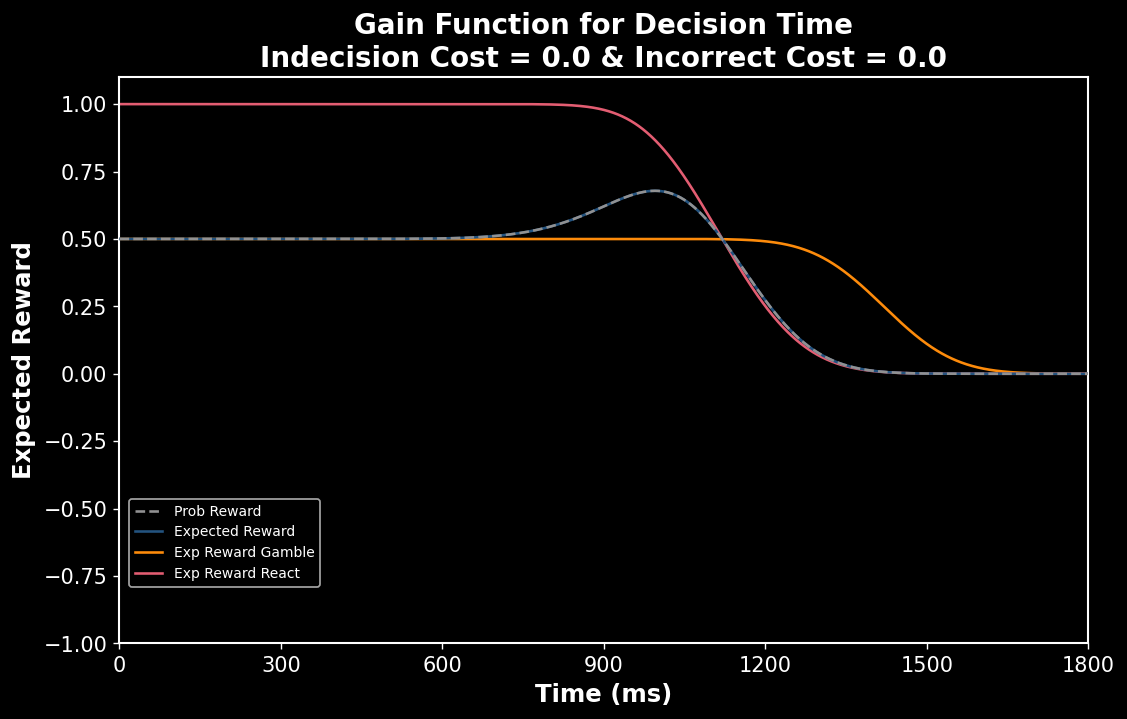

Optimal Decision Time: 995
Optimal Decision Time (Prob): 995
Maximum Expected Reward: 0.6785067429075899
Gamble Target Reach Time: 1075
Reaction Target Reach Time: 1375
995 0.6785067429075899


In [33]:
timing_uncertainty = 100
x,y = find_optimal_decision_time(1000, 150, reaction_time, movement_time, reaction_movement_uncertainty, movement_uncertainty,timing_uncertainty,
                                 plot=True,save=False)
print(x,y)

#### Calculate optimals

In [34]:
agent_means = np.array([1000,1000,1100,1100,1200,1200])
agent_stds = np.array([50,150,50,150,50,150])
reaction_time = 300
movement_time = 80
reaction_movement_uncertainty = 60 # We have some uncertainty about making it 
movement_uncertainty = 30

optimal_decision_times = np.zeros(len(agent_means))
optimal_rewards = np.zeros(len(agent_means))
optimal_reach_times = np.zeros(len(agent_means))
i=-1
for mean,std in zip(agent_means,agent_stds):
    i+=1
    optimal_decision_times[i],optimal_rewards[i] = find_optimal_decision_time(mean, std, reaction_time, movement_time, reaction_movement_uncertainty, movement_uncertainty,timing_uncertainty,plot=False)
    # optimal_reach_times[i] = find_optimal_reach_time(mean,std,reaction_time,movement_time,reaction_movement_uncertainty,movement_uncertainty,plot = False)
    
print(optimal_decision_times)

[1028.  995. 1076. 1020. 1096. 1040.]


#### Calculate number of indecisions and wins based on timing uncertainty 

We have 
1. Reach Time on gambles and reactions
2. The probability of reacting and gambling
  - If the agent goes before my decision time, that is a reaction
  - If the agent goes after my decision time, that is a gamble
  - We calculate the prob of that happening based on the optimal decision time and the agent means stds
3. Then we have the probability of an indecision IF i react and IF I gamble
  - This is the probability of my reach time on a reaction being greater than 1500 (react_reach_time = decision_time + reaction_time + movement_time)
  - Also prob of my reach time on a gamble being greater than 1500 (gamble_reach_time = decision_time + movement_time)
4. Total probability of indecision is
  - Probability of reacting multiplied by prob of indecision if I react + prob of gambling multiplied by prob of indecision

In [35]:
# Establish reach times
reach_time_gamble = optimal_decision_times + movement_time
reach_time_reaction = optimal_decision_times + reaction_movement_time

# Calculate difference of distributions
mean_diff = optimal_decision_times - agent_means
std_diff = np.sqrt(reaction_movement_uncertainty**2 + agent_stds**2) 
prob_react = 1 - stats.norm.cdf(0, mean_diff,std_diff) # Probability that optimal decision time is after the agent goes (aka we react)  NEEDED TO DO THE TWO DISTRIBUTION DIFFERENCE THING
prob_gamble = 1 - prob_react

prob_indecision_if_react = 1 - stats.norm.cdf(1500,reach_time_reaction,reaction_movement_uncertainty) # Probability that the reach time reaction is > 1500 
prob_indecision_if_gamble = 1 - stats.norm.cdf(1500,reach_time_gamble,movement_uncertainty)
prob_indecision = prob_react*prob_indecision_if_react + prob_gamble*prob_indecision_if_gamble


prob_win_if_react = (1-prob_indecision_if_react)*1.0 # prob win if react is the probability that I don't make a decision times the probability that i select the right target (1.0)
prob_win_if_gamble = (1-prob_indecision_if_gamble)*0.5 # prob win if gamble is the probability that I don't make a decision times the probabiliyt that I select the right target(0.5)


prob_incorrect_if_react = 0
prob_incorrect_if_gamble = (1-prob_indecision_if_gamble)*0.5

prob_win = prob_react*prob_win_if_react + prob_gamble*prob_win_if_gamble

prob_incorrect = prob_react*prob_incorrect_if_react + prob_gamble*prob_incorrect_if_gamble
print(f'Agent means = {agent_means}')
print(f'Agent Stds = {agent_stds}')
print(f'Prob indecision = {prob_indecision*100}')
print(f'Prob win =        {prob_win*100}')
print(f'Prob incorrect =  {prob_incorrect*100}')
print(prob_indecision + prob_win + prob_incorrect)

Agent means = [1000 1000 1100 1100 1200 1200]
Agent Stds = [ 50 150  50 150  50 150]
Prob indecision = [4.006304   0.90754672 8.78780586 1.48261856 3.15284063 1.46845865]
Prob win =        [77.99452785 73.47520414 60.17778862 64.02907457 51.42208619 56.58131118]
Prob incorrect =  [17.99916815 25.61724914 31.03440552 34.48830687 45.42507318 41.95023017]
[1. 1. 1. 1. 1. 1.]


In [36]:
prob_gamble*prob_win_if_gamble

array([0.17999168, 0.25617249, 0.31034406, 0.34488307, 0.45425073,
       0.4195023 ])

In [37]:
i = 4
print(optimal_decision_times[i])
print(reach_time_reaction[i])
print(prob_react[i])
print(prob_indecision_if_react[i])
print(prob_indecision_if_react[i]*prob_react[i])

1096.0
1476.0
0.09149853649176365
0.3445782583896758
0.03152840634953612


In [38]:
print(f'Indecisions: {1 - stats.norm.cdf(1500,optimal_decision_times+movement_time+reaction_time,reaction_movement_uncertainty)}')

print(f'Wins:        {1 - stats.norm.cdf(0,optimal_decision_times - agent_means,np.sqrt(agent_stds**2 + reaction_movement_uncertainty**2))}')

Indecisions: [0.06259687 0.01861043 0.23167757 0.04779035 0.34457826 0.09121122]
Wins:        [0.64001664 0.48765502 0.37931189 0.31023386 0.09149854 0.1609954 ]


In [39]:
#%% Calculating analytical probability
def calculate_prob_wins_indecisions_using_reach_times(reaction_time, player_reach_mean, player_sd, agent_reach_mean, agent_sd):
    # Standard deviation 
    sig1,sig2 = player_sd,agent_sd # Sig 1 is player, sig 2 is agent
    var1,var2 = sig1**2,sig2**2
    var_diff = sig1**2 + sig2**2
    sig_diff = np.sqrt(var_diff)
    
    # Expected value multipliers 
    P_100, P_50, P_0 = 1,0.5,0
    reach_mean_diff = player_reach_mean - agent_reach_mean
    # Probabilites 
    player_less_1500 = stats.norm.cdf(1500,player_reach_mean,sig1)
    player_greater_1500 = 1 - player_less_1500
    agent_less_1500 = stats.norm.cdf(1500,agent_reach_mean,sig2)
    agent_greater_1500 = 1 - agent_less_1500
    diff_less_reaction = stats.norm.cdf(reaction_time,reach_mean_diff,sig_diff)
    diff_greater_reaction = 1 - diff_less_reaction

    player_random_win = diff_less_reaction*player_less_1500*agent_less_1500*P_50
    player_sensory_evidence_win = diff_greater_reaction*P_100*player_less_1500*agent_less_1500*P_100
    player_win_from_opp_indecision = player_less_1500*agent_greater_1500*P_100
    player_indecision = player_greater_1500

    player_win_rate = player_random_win + player_sensory_evidence_win + player_win_from_opp_indecision
    print(player_reach_mean,player_greater_1500,stats.norm.cdf(1500,player_reach_mean,sig1))

    return player_win_rate,player_indecision

In [40]:
p1_win_rates = np.zeros(len(optimal_reach_times))
p1_indecision_rates = np.zeros(len(optimal_reach_times))
decision_timing_uncertainty = 50
agent_reach_means = np.array(agent_means) + 150
for i in range(len(optimal_reach_times)):
    p1_win_rates[i],p1_indecision_rates[i] = calculate_prob_wins_indecisions_using_reach_times(reaction_time,optimal_reach_times[i], decision_timing_uncertainty, agent_reach_means[i], agent_stds[i])
print(f'P1 Win Rates: {p1_win_rates}')
print(f'P1 Indecisions Rates: {p1_indecision_rates}')

0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
P1 Win Rates: [0.5        0.50490766 0.50000014 0.52389518 0.50067495 0.57932763]
P1 Indecisions Rates: [0. 0. 0. 0. 0. 0.]


In [41]:
#%% Calculating analytical probability
def calculate_prob_wins_indecisions_using_decision_time(reaction_time, movement_time, player_decision_means, player_sd, agent_decision_means,agent_sd):
    # Standard deviation 
    sig1,sig2 = player_sd,agent_sd # Sig 1 is player, sig 2 is agent
    var_diff = sig1**2 + sig2**2
    sig_diff = np.sqrt(var_diff)
    agent_movement_time = 150
    # Expected value multipliers 
    P_100, P_50, P_0 = 1,0.5,0
    decision_means_diff = player_decision_means - agent_decision_means
    # Probabilites 
    p1_less_1500 = stats.norm.cdf(1500,player_decision_means+movement_time+reaction_time,sig1)
    p1_greater_1500 = 1 - p1_less_1500
    p2_less_1500 = stats.norm.cdf(1500, agent_decision_means+agent_movement_time,sig2)
    p2_greater_1500 = 1 - p2_less_1500
    diff_less_reaction = stats.norm.cdf(0,decision_means_diff,sig_diff)
    diff_greater_reaction = 1 - diff_less_reaction
    
    p1_random_win = diff_less_reaction*p1_less_1500*p2_less_1500*P_50
    p1_sensory_evidence_win = diff_greater_reaction*P_100*p1_less_1500*p2_less_1500*P_100
    p1_win_from_opp_indecision = p1_less_1500*p2_greater_1500*P_100
    p1_indecision = p1_greater_1500
    
    
    p1_win_rate = p1_random_win + p1_sensory_evidence_win + p1_win_from_opp_indecision
    return p1_win_rate,p1_indecision

In [42]:
agent_means

array([1000, 1000, 1100, 1100, 1200, 1200])

In [43]:
p1_win_rates = np.zeros(len(optimal_decision_times))
p1_indecision_rates = np.zeros(len(optimal_decision_times))
decision_timing_uncertainty = 50
for i in range(len(optimal_decision_times)):
    p1_win_rates[i],p1_indecision_rates[i] = calculate_prob_wins_indecisions_using_decision_time(reaction_time,movement_time,optimal_decision_times[i],decision_timing_uncertainty,agent_means[i],agent_stds[i])
print(f'P1 Win Rates: {p1_win_rates}')
print(f'P1 Indecisions Rates: {p1_indecision_rates}')



P1 Win Rates: [0.79977584 0.74157525 0.55408569 0.65455524 0.36680694 0.6095245 ]
P1 Indecisions Rates: [0.03288412 0.00620967 0.18942965 0.02275013 0.3156137  0.05479929]


I have a nice framework, now I need to do this optimal stopping style where I make a decision at every time step 
- Maybe multiply the expected reward function at each time step by the probability that I will actually select time T given i choose time U
- Also need to somehow compare the reward of waiting one more timestep and the reward of going now
   - This is likely a different way of thinking than the expected gain function I had from before

In [44]:
expected_reward_gamble

array([0., 0., 0., ..., 0., 0., 0.])